<div class="alert alert-info">
<br> Ссылка на презентацию: https://drive.google.com/file/d/1Yhsa4QzXIm1p9UxhI8Igl4_rZ5hECYAH/view?usp=sharing 
<br>Ссылка на дешборд: https://public.tableau.com/app/profile/assboiler/viz/final_proj_dash_16798330715410/Dashboard1?publish=yes 
</div>

<b>Банки — Анализ оттока клиентов из регионального банка</b>

<b>Цели исследования:</b> 
- На основании поведения клиентов определить вероятность их ухода
- Определение приоритетных(наиболее склонны к уходу) групп клиентов для их удержания

<b>Оглавление:</b>

1. Предобработка данных

- 1.1 Исследование и замена пропущенных значений
- 1.2 Исследование и приведениесоответствия типов данных
- 1.3 Исследование и удаление дубликатов
- 1.4 Проверка корректности наименований колонок и их переименование

2. Исследовательский анализ данных
- 2.1 Поиск корреляции признаков, которые определяют клиентов, склонных к уходу
- 2.2 Формирование портрета клиента, склонного к уходу
- 2.3 Выделение семента клиентов, склонных к уходу
3. Формулировка и проверка гепотез

- 3.1 Формулировка гипотезы 1
- 3.2 Проверка гепотезы 1
- 3.3 Формулировка гипотезы 2
- 3.4 Проверка гепотезы 2

4. Подведение итогов исследования, составление рекомендаций


<b>1. Предобработка данных </b>

In [133]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from scipy import stats as st

In [134]:
try:
    data = pd.read_csv("/datasets/bank_dataset.csv")
except FileNotFoundError:
    data = pd.read_csv(r"C:\Users\yakhutinma\Documents\bank_dataset.csv")
data

,userid,score,City,Gender,Age,Objects,Balance,Products,CreditCard,Loyalty,estimated_salary,Churn
0,15677338,619,Ярославль,Ж,42,2,NaN,1,1,1,101348.88,1
1,15690047,608,Рыбинск,Ж,41,1,83807.86,1,0,1,112542.58,0
2,15662040,502,Ярославль,Ж,42,8,159660.80,3,1,0,113931.57,1
3,15744090,699,Ярославль,Ж,39,1,NaN,2,0,0,93826.63,0
4,15780624,850,Рыбинск,Ж,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,Ярославль,М,39,5,NaN,2,1,0,96270.64,0
9996,15612628,516,Ярославль,М,35,10,57369.61,1,1,1,101699.77,0
9997,15627268,709,Ярославль,Ж,36,7,NaN,1,0,1,42085.58,1
9998,15725091,772,Ростов Великий,М,42,3,75075.31,2,1,0,92888.52,1


<b>1.1 Исследование пропущенных значений </b>

In [135]:
data.isna().sum()

userid                 0
score                  0
City                   0
Gender                 0
Age                    0
Objects                0
Balance             3617
Products               0
CreditCard             0
Loyalty                0
estimated_salary       0
Churn                  0
dtype: int64

In [136]:
tmp = data
tmp['Balance'] = tmp['Balance'].fillna(-1)
tmp = tmp[tmp['Balance'] == -1]
tmp = tmp.groupby('City',as_index=False).agg({'Age':'count'})
tmp1 = data.groupby('City',as_index=False).agg({'Age':'count'})
tmp['perc'] = round(tmp['Age']/tmp1['Age'],2)
tmp

,City,Age,perc
0,Рыбинск,1199,0.48
1,Ярославль,2418,0.98


<b>Вывод:</b> Пропущенные значения есть только в 2 из трех городов: Рыбинск и Ярославль. Вероятно, по этим городам возникли технические проблемы со сбором данных или системные ошибки. В процентном соотношении пропусков очень много, нужно использовать заглушку

In [137]:
data['Balance'] = data['Balance'].fillna(-1)

In [138]:
data.isna().sum()

userid              0
score               0
City                0
Gender              0
Age                 0
Objects             0
Balance             0
Products            0
CreditCard          0
Loyalty             0
estimated_salary    0
Churn               0
dtype: int64

<b>Вывод: </b>Значения отсутствуют только в столбце "Баланс". Пустые значения в этом столбце были заменены заглушкой. Причиной пропусков могло послужить то, что клиенты решили скрыть данные о средствах на счету или системный сбой при получении данных

<b>1.2 Исследование соответствия типов данных</b>

In [139]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   userid            10000 non-null  int64  
 1   score             10000 non-null  int64  
 2   City              10000 non-null  object 
 3   Gender            10000 non-null  object 
 4   Age               10000 non-null  int64  
 5   Objects           10000 non-null  int64  
 6   Balance           10000 non-null  float64
 7   Products          10000 non-null  int64  
 8   CreditCard        10000 non-null  int64  
 9   Loyalty           10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  Churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Преведение типов данных не требуется

<b>1.3 Исследование дубликатов</b>

In [140]:
data.duplicated().sum()

0

In [141]:
data.duplicated(subset=['userid','City']).sum()

0

In [142]:
data.duplicated(subset=['userid']).sum()

0

Дубликатов в датасете не обнаружено

<b>1.4 Проверка корректности наименований колонок</b>

In [143]:
data.columns

Index(['userid', 'score', 'City', 'Gender', 'Age', 'Objects', 'Balance',
       'Products', 'CreditCard', 'Loyalty', 'estimated_salary', 'Churn'],
      dtype='object')

In [144]:
data.columns = data.columns.str.lower()

In [145]:
data.columns

Index(['userid', 'score', 'city', 'gender', 'age', 'objects', 'balance',
       'products', 'creditcard', 'loyalty', 'estimated_salary', 'churn'],
      dtype='object')

Столбцы названы достаточно информотивно, нет смысла их переименовывать. Названия столбцов были приведены к нижнему регистрку для удобства работы с ними.

In [146]:
cat_data = pd.get_dummies(data, columns = ['gender','city'])
cat_data

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль
0,15677338,619,42,2,-1.00,1,1,1,101348.88,1,1,0,0,0,1
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1
3,15744090,699,39,1,-1.00,2,0,0,93826.63,0,1,0,0,0,1
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15648965,771,39,5,-1.00,2,1,0,96270.64,0,0,1,0,0,1
9996,15612628,516,35,10,57369.61,1,1,1,101699.77,0,0,1,0,0,1
9997,15627268,709,36,7,-1.00,1,0,1,42085.58,1,1,0,0,0,1
9998,15725091,772,42,3,75075.31,2,1,0,92888.52,1,0,1,1,0,0


<b>2. Исследовательский анализ данных </b>

<b>2.1 Поиск корреляции признаков, которые определяют клиентов, склонных к уходу</b>

In [147]:
cat_data.corr()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль
userid,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248,0.002641,-0.002641,-0.003097,0.007800,-0.004049
score,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094,0.002857,-0.002857,0.005538,0.004780,-0.008928
age,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323,0.027544,-0.027544,0.046897,-0.001685,-0.039208
objects,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001,-0.014733,0.014733,-0.000567,0.003868,-0.002848
balance,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012798,0.118533,-0.012087,0.012087,0.401111,-0.134892,-0.231329
products,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820,0.021859,-0.021859,-0.010419,0.009039,0.001230
creditcard,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138,-0.005766,0.005766,0.010577,-0.013480,0.002467
loyalty,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128,-0.022544,0.022544,-0.020486,0.016732,0.003317
estimated_salary,0.015271,-0.001384,-0.007201,0.007784,0.012798,0.014204,-0.009933,-0.011421,1.000000,0.012097,0.008112,-0.008112,0.010297,-0.006482,-0.003332
churn,-0.006248,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.106512,-0.106512,0.173488,-0.052667,-0.104955


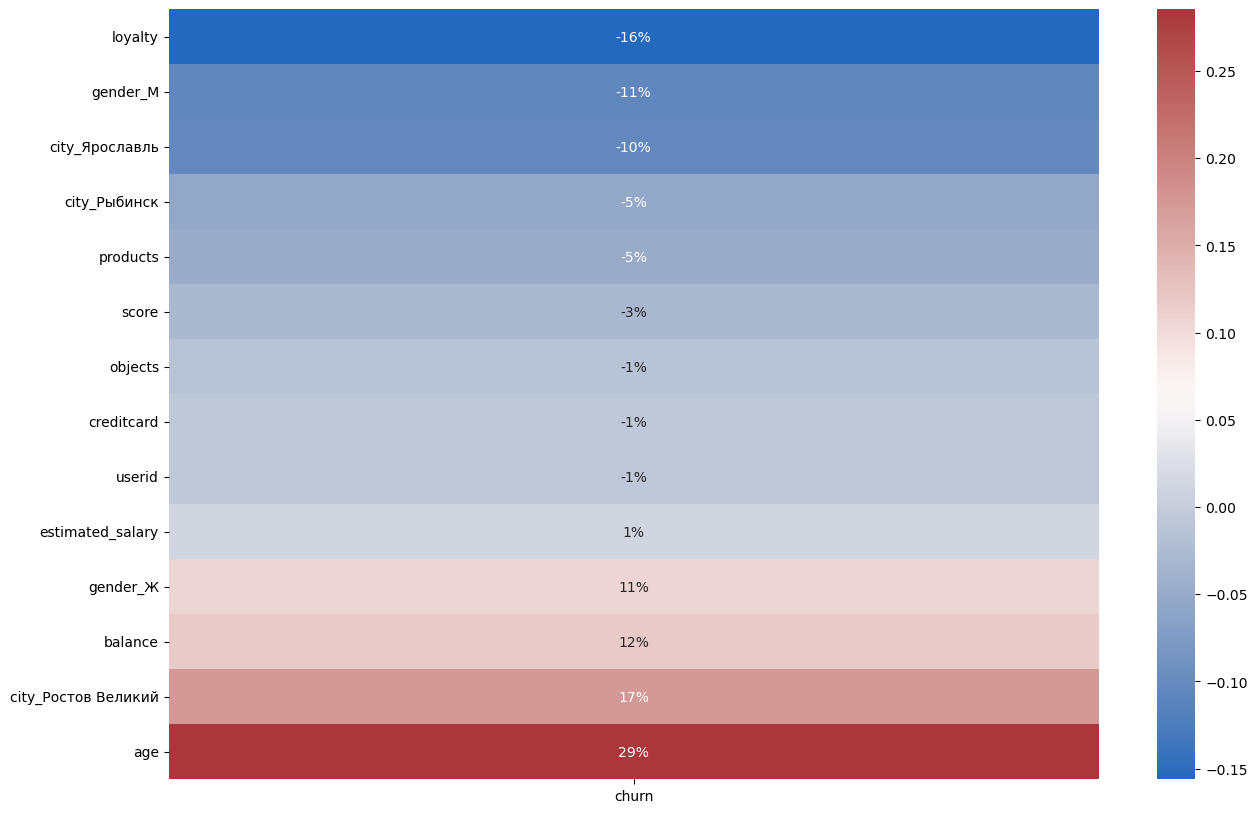

In [148]:
plt.figure(figsize=(15,10))
sns.heatmap(cat_data.corr().loc[:,['churn']].drop('churn').sort_values('churn'),fmt=".0%",cmap='vlag',annot=True)
plt.show()

<b>Вывод:</b> Исходя из графика корреляции можно предположить, что есть зависимость оттока клиентов от:

1) Возраста

2) Город: Ростов Великий

3) Баланса

4) Пол: Женский

<b>2.2 Формирование портрета клиента, склонного к уходу</b>

In [149]:
tmp = cat_data[cat_data['churn'] == 1]
tmp.groupby('age',as_index = False).agg({'churn':'count'}).sort_values(by = 'churn',ascending = False)

,age,churn
28,46,91
22,40,89
25,43,88
27,45,87
30,48,80
24,42,77
29,47,77
31,49,75
26,44,73
21,39,72


In [150]:
cat_data['age_group'] = 0
for i in range(len(cat_data)):
    if cat_data['age'][i] >= 18 and cat_data['age'][i] <= 33:
        cat_data['age_group'][i] = 1
    elif cat_data['age'][i] >= 34 and cat_data['age'][i] <= 49:
        cat_data['age_group'][i] = 2
    elif cat_data['age'][i] >= 50 and cat_data['age'][i] <= 65:
        cat_data['age_group'][i] = 3
    else:
        cat_data['age_group'][i] = 4
cat_data.head()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль,age_group
0,15677338,619,42,2,-1.00,1,1,1,101348.88,1,1,0,0,0,1,2
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,2
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,2
3,15744090,699,39,1,-1.00,2,0,0,93826.63,0,1,0,0,0,1,2
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0,2


В датасет были добавлены группы возраста:
- 1 - с 18 до 33 лет
- 2 - с 34 до 49 лет
- 3 - с 50 до 65 лет
- 4 - старше 65 лет

In [202]:
tmp = cat_data.groupby('age_group',as_index=False).agg({'churn':'sum','age':'count'})
tmp['perc'] = round(tmp['churn'] / tmp['age'],2)
tmp['churn_overall'] = round(tmp['churn']/cat_data['churn'].sum(),3)
tmp.columns=('Возрастная группа №','Ушло клиентов','Размер группы','Доля ушедших','Доля от общего числа ушедших')
tmp

,Возрастная группа №,Ушло клиентов,Размер группы,Доля ушедших,Доля от общего числа ушедших
0,1,257,3232,0.08,0.126
1,2,1146,5373,0.21,0.563
2,3,599,1131,0.53,0.294
3,4,35,264,0.13,0.017


<b>Вывод:</b> исходя из таблицы можно сделать вывод о том, что наиболее часто уходят клиенты в возрасте 34-49(более 50%)

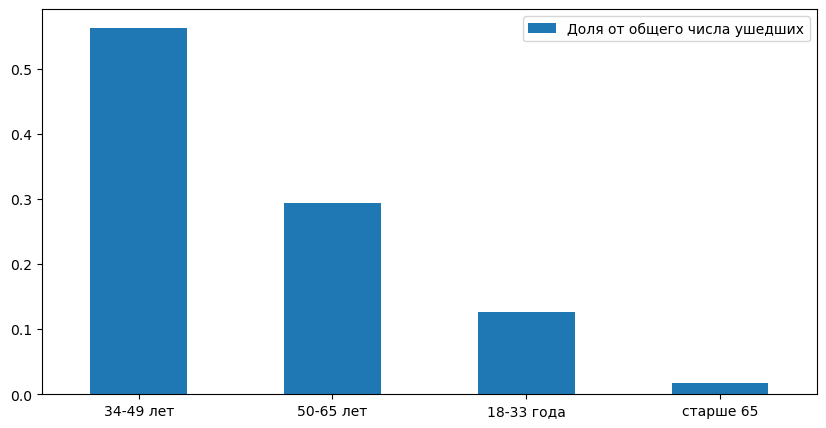

In [203]:
tmp.index = ['18-33 года','34-49 лет','50-65 лет','старше 65']
tmp = tmp.sort_values(by='Доля от общего числа ушедших',ascending=False)

tmp.plot(y='Доля от общего числа ушедших',kind='bar',figsize=(10,5))
plt.xticks(rotation = 0)
plt.show()

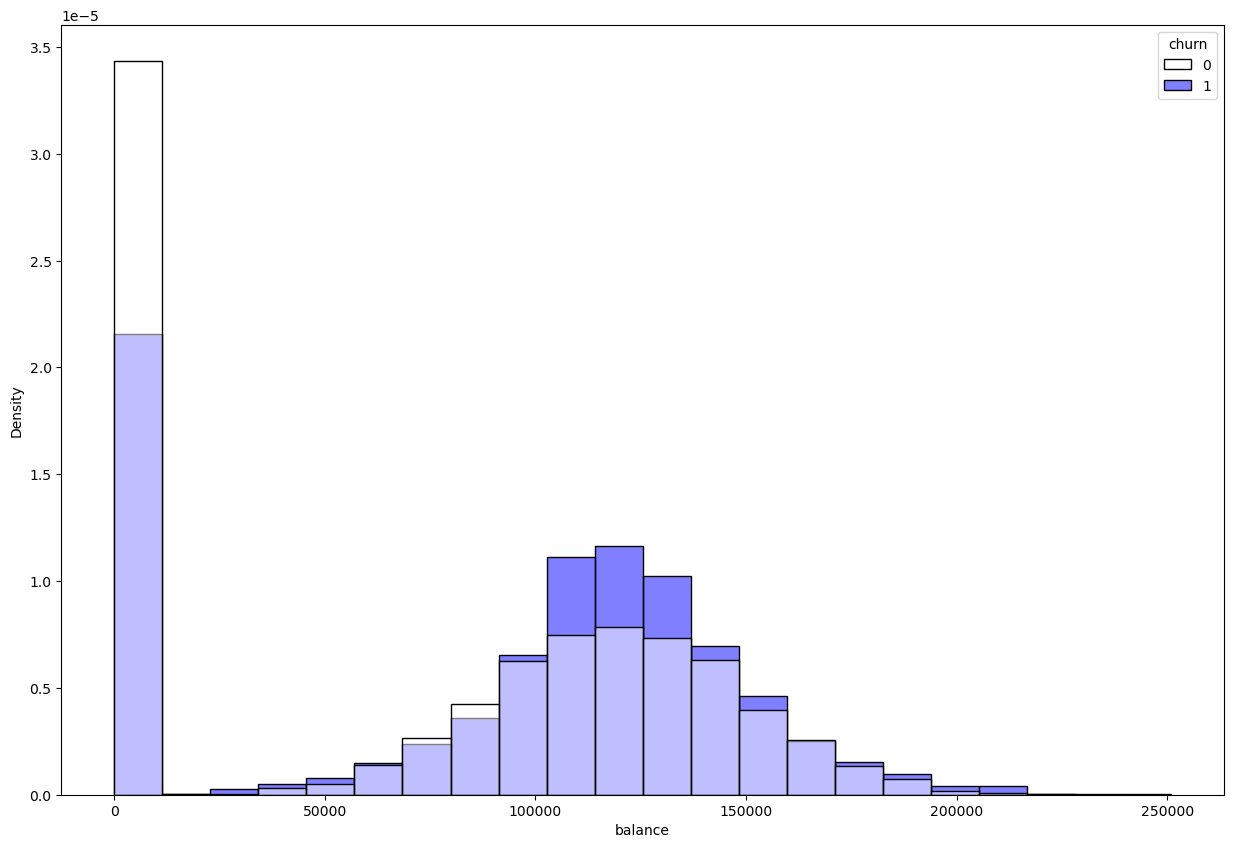

In [152]:
plt.figure(figsize=(15,10))
sns.histplot(data=data, hue="churn", x="balance",stat="density",common_norm=False,palette="flag") 
plt.show()

In [161]:
balance_data = cat_data
balance_data = balance_data[balance_data['balance'] != -1].reset_index(drop=True)
balance_data['balance_group'] = 0

In [162]:
for i in range(len(balance_data)):
    if balance_data['balance'][i] >= 0 and balance_data['balance'][i] <= 50000:
        balance_data['balance_group'][i] = 1
    elif balance_data['balance'][i] > 50000 and balance_data['balance'][i] <= 100000:
        balance_data['balance_group'][i] = 2
    elif balance_data['balance'][i] > 100000 and balance_data['balance'][i] <= 150000:
        balance_data['balance_group'][i] = 3
    elif balance_data['balance'][i] > 150000 and balance_data['balance'][i] <= 200000:
        balance_data['balance_group'][i] = 4
    else:
        balance_data['balance_group'][i] = 5
balance_data.head()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль,age_group,balance_group
0,15690047,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,2,2
1,15662040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,2,4
2,15780624,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0,2,3
3,15616748,645,44,8,113755.78,2,1,0,149756.71,1,0,1,0,1,0,2,3
4,15698884,376,29,4,115046.74,4,1,0,119346.88,1,1,0,1,0,0,1,3


В дата сет был добавлен столбец разделяющий его на группы по уровню баланса:
- 1 - от 0 до 50000
- 2 - от 50000 до 100000
- 3 - от 100000 до 150000
- 4 - от 150000 до 200000
- 5 - более 200000

In [163]:
tmp = balance_data.groupby('balance_group',as_index=False).agg({'churn':'sum','age':'count'})
tmp['perc'] = round(tmp['churn'] / tmp['age'],2)
tmp['churn_overall'] = round(tmp['churn']/balance_data['churn'].sum(),3)
tmp.columns=('Группа баланса №','Ушло клиентов','Размер группы','Доля ушедших','Доля от общего числа ушедших')
tmp

,Группа баланса №,Ушло клиентов,Размер группы,Доля ушедших,Доля от общего числа ушедших
0,1,26,75,0.35,0.017
1,2,300,1509,0.20,0.195
2,3,987,3830,0.26,0.642
3,4,205,935,0.22,0.133
4,5,19,34,0.56,0.012


<b>Вывод:</b> наибольший процент ухода клиентов с балансом более 200000, но в этой группе всего 34 клиента. Эту группу можно принять к сведению, но основной группой для изучения стоит взять группу 3(100-150к), процент ухода клиентов которой составляет 26%, при этом 64% из всех ушедших клиентов

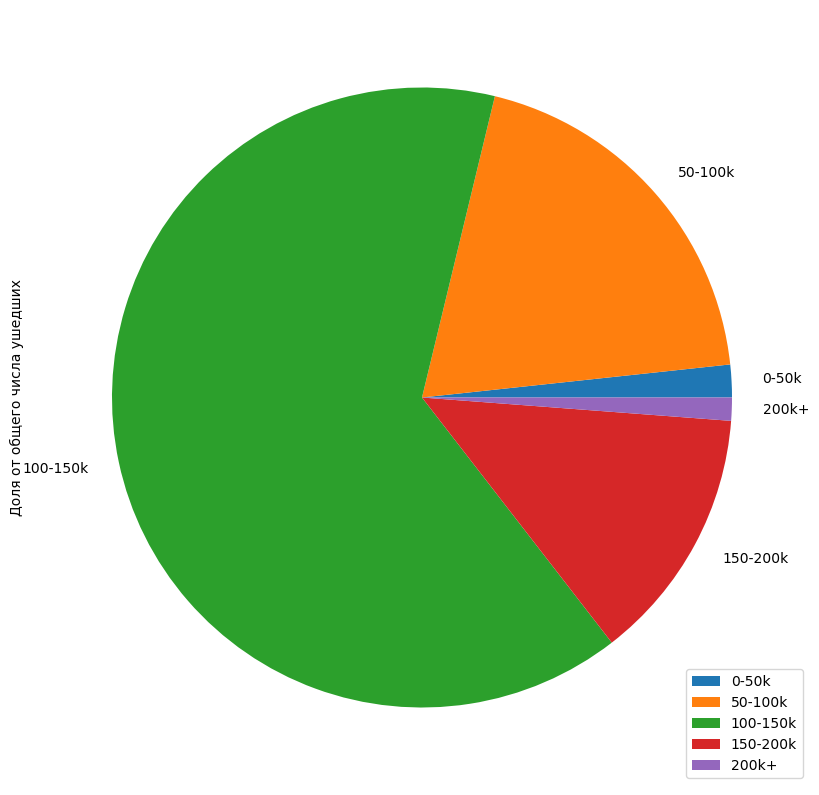

In [176]:
tmp.index = ['0-50k','50-100k','100-150k','150-200k','200k+']
tmp.plot(y='Доля от общего числа ушедших',kind='pie',figsize=(10,13))
plt.show()

In [205]:
tmp = cat_data.groupby('objects',as_index=False).agg({'age':'count','churn':'sum'})
tmp['perc_of_churn'] = round(tmp['churn']/tmp['age'],2)
tmp['churn_overall'] = round(tmp['churn']/cat_data['churn'].sum(),3)
tmp.columns=('Количество объектов','Размер группы','Ушло клиентов','Доля ушедших','Доля от общего числа ушедших')
tmp

,Количество объектов,Размер группы,Ушло клиентов,Доля ушедших,Доля от общего числа ушедших
0,0,413,95,0.23,0.047
1,1,1035,232,0.22,0.114
2,2,1048,201,0.19,0.099
3,3,1009,213,0.21,0.105
4,4,989,203,0.21,0.100
5,5,1012,209,0.21,0.103
6,6,967,196,0.20,0.096
7,7,1028,177,0.17,0.087
8,8,1025,197,0.19,0.097
9,9,984,213,0.22,0.105


<b>Вывод: </b>Самый большой процент ухода у клиентов без объектов в собственности, при делении по группам, но эта группа слишком мала, а значит не репрезентативна. Для изучения будет браться группа с 1 объектом собственности т.к. процент ухода по группам у нее 22%, а так же 11% от всех ушедших клиентов

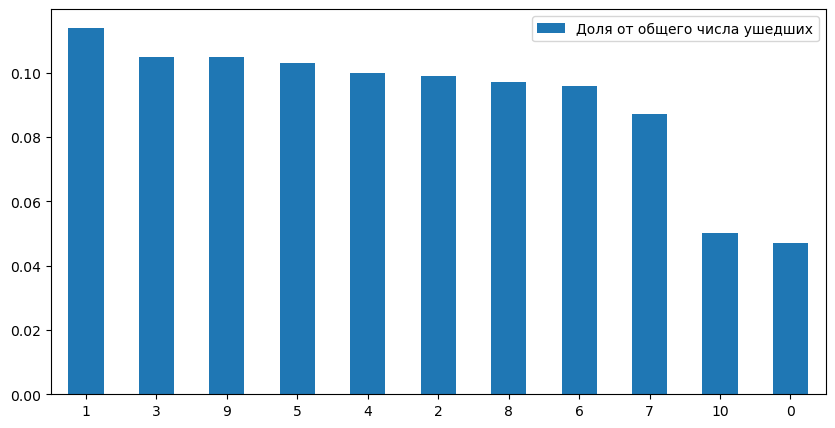

In [206]:
tmp = tmp.sort_values(by='Доля от общего числа ушедших',ascending=False)
tmp.plot(y='Доля от общего числа ушедших',kind='bar',figsize=(10,5))
plt.xticks(rotation = 0)
plt.show()

In [212]:
tmp = cat_data.groupby('products',as_index=False).agg({'age':'count','churn':'sum'})
tmp['perc of churn'] = round(tmp['churn']/tmp['age'],2)
tmp['churn_overall'] = round(tmp['churn']/cat_data['churn'].sum(),3)
tmp.columns=('Количество продуктов','Размер группы','Ушло клиентов','Доля ушедших','Доля от общего числа ушедших')
tmp

,Количество продуктов,Размер группы,Ушло клиентов,Доля ушедших,Доля от общего числа ушедших
0,1,5084,1409,0.28,0.692
1,2,4590,348,0.08,0.171
2,3,266,220,0.83,0.108
3,4,60,60,1.00,0.029


<b>Вывод:</b> Чаще всего уходят люди(100%), у которых 4 продукта, но эта группа крайне мала(60 чел), можно принять эту группу к сведению. У наибольшего числа ушедших клиентов(70% от общего числа ушедших) был подключен всего 1 продукт. 

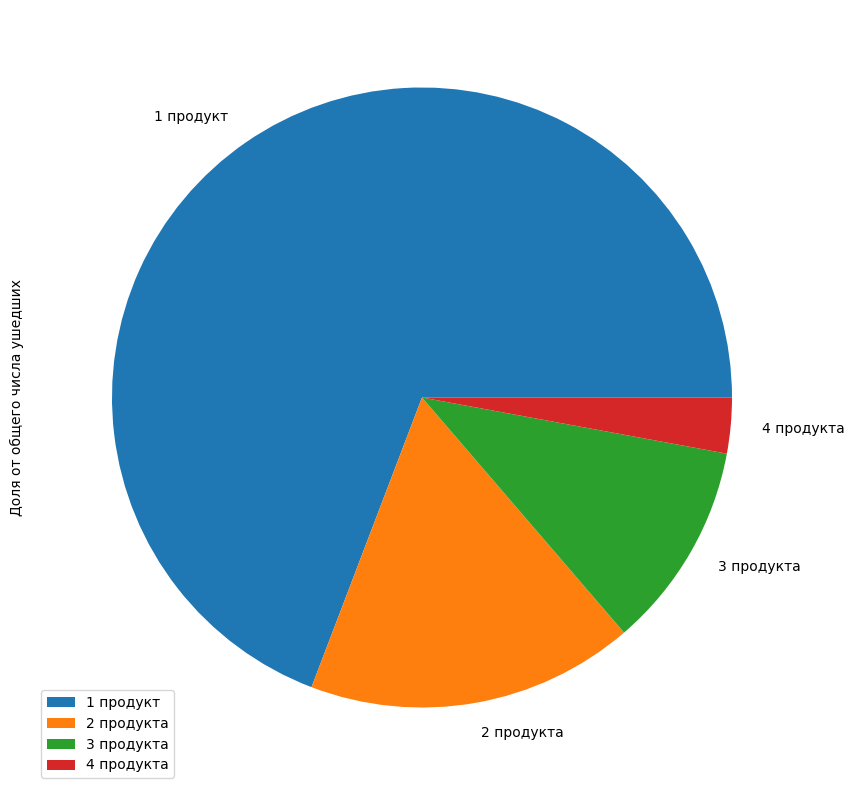

In [211]:
tmp.index = ['1 продукт','2 продукта','3 продукта','4 продукта']
tmp.plot(y='Доля от общего числа ушедших',kind='pie',figsize=(10,13))
plt.show()

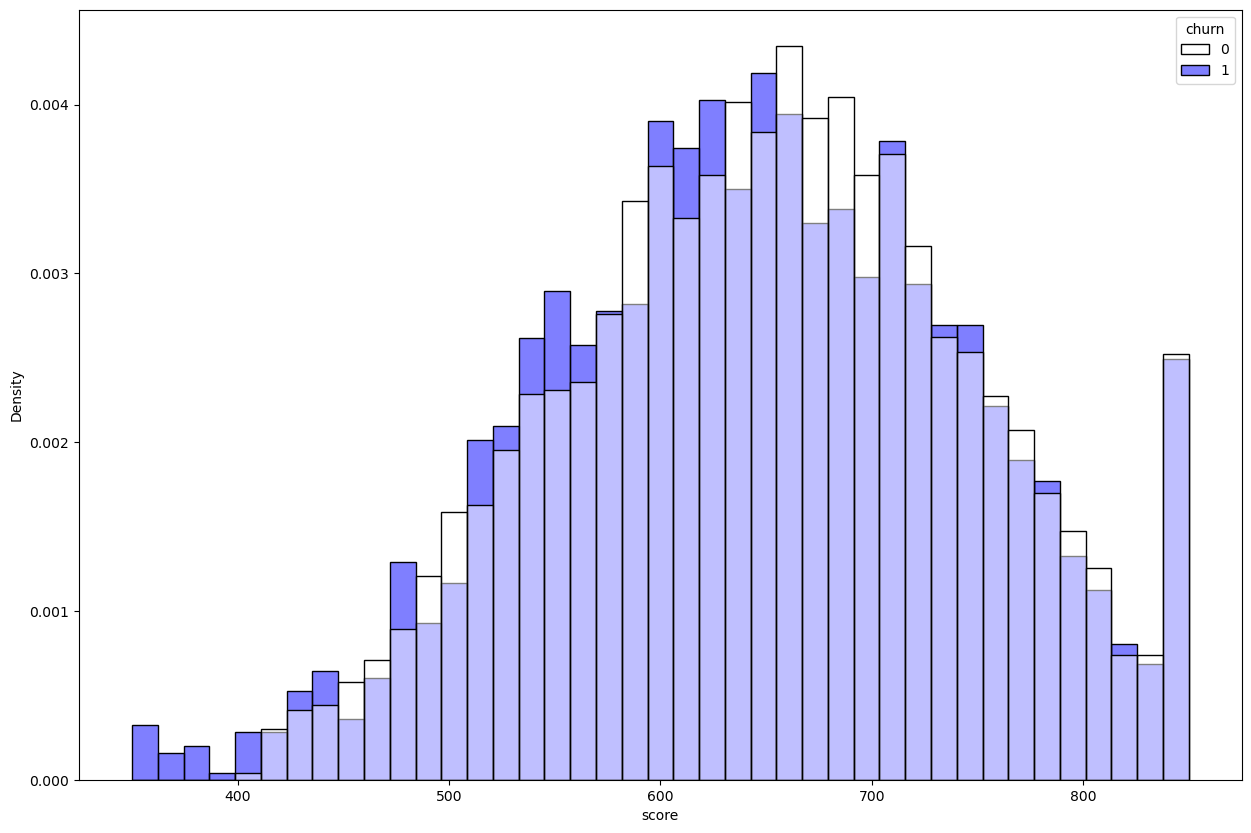

In [119]:
plt.figure(figsize=(15,10))
sns.histplot(data=cat_data, hue="churn", x="score",stat="density",common_norm=False,palette="flag") 
plt.show()

In [214]:
cat_data['score_group'] = 0
for i in range(len(cat_data)):
    if cat_data['score'][i] >= 0 and cat_data['score'][i] <= 350:
        cat_data['score_group'][i] = 1
    elif cat_data['score'][i] > 350 and cat_data['score'][i] <= 550:
        cat_data['score_group'][i] = 2
    elif cat_data['score'][i] > 550 and cat_data['score'][i] <= 800:
        cat_data['score_group'][i] = 3
    else:
        cat_data['score_group'][i] = 4
cat_data.head()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль,age_group,score_group
0,15677338,619,42,2,-1.00,1,1,1,101348.88,1,1,0,0,0,1,2,3
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,2,3
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,2,2
3,15744090,699,39,1,-1.00,2,0,0,93826.63,0,1,0,0,0,1,2,3
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0,2,4


В дата сет был добавлен столбец разделяющий его на группы по уровню кредитных очков:
- 1 - от 0 до 350
- 2 - от 351 до 550
- 3 - от 551 до 800
- 4 - более 800

In [220]:
tmp = cat_data.groupby('score_group',as_index=False).agg({'age':'count','churn':'sum'})
tmp['perc of churn'] = round(tmp['churn']/tmp['age'],2)
tmp['churn_overall'] = round(tmp['churn']/cat_data['churn'].sum(),3)
tmp.columns=('Кредитная группа №','Размер группы','Ушло клиентов','Доля ушедших','Доля от общего числа ушедших')
tmp

,Кредитная группа №,Размер группы,Ушло клиентов,Доля ушедших,Доля от общего числа ушедших
0,1,5,5,1.00,0.002
1,2,1616,363,0.22,0.178
2,3,7734,1542,0.20,0.757
3,4,645,127,0.20,0.062


<b>Вывод:</b> Больше всего ушедших относительно общего количества ушедших клиентов(75%) имели количество кредитных очков от 551 до 800. 

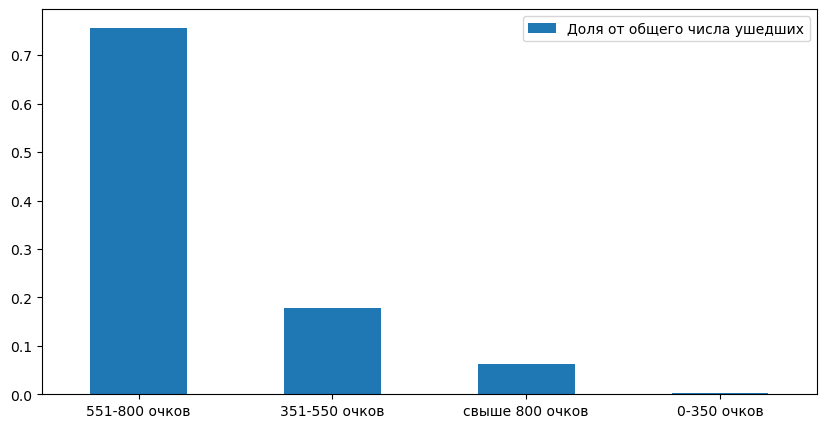

In [221]:
tmp.index = ['0-350 очков','351-550 очков','551-800 очков','свыше 800 очков']

tmp = tmp.sort_values(by='Доля от общего числа ушедших',ascending=False)
tmp.plot(y='Доля от общего числа ушедших',kind='bar',figsize=(10,5))
plt.xticks(rotation = 0)
plt.show()

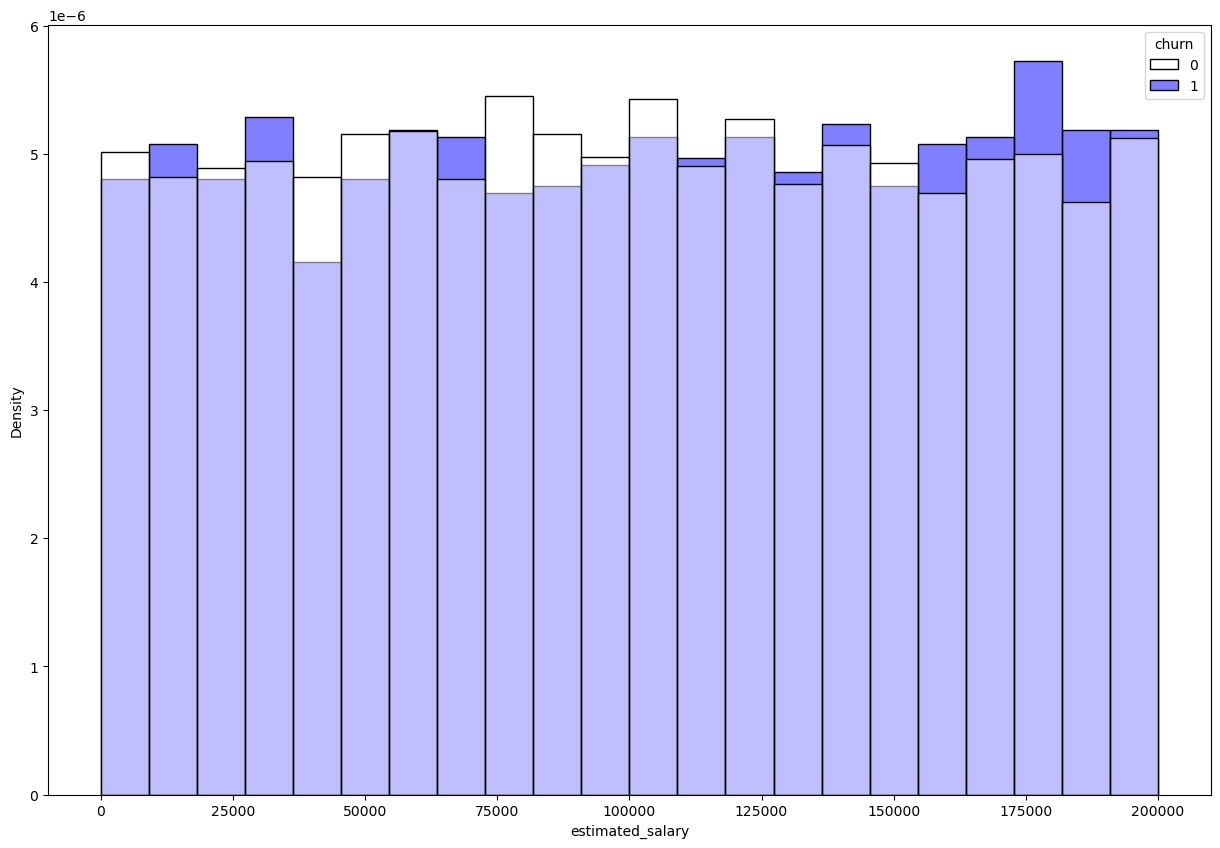

In [122]:
plt.figure(figsize=(15,10))
sns.histplot(data=cat_data, hue="churn", x="estimated_salary",stat="density",common_norm=False,palette="flag") 
plt.show()

In [223]:
cat_data['salary_group'] = 0
for i in range(len(cat_data)):
    if cat_data['estimated_salary'][i] >= 0 and cat_data['estimated_salary'][i] <= 50000:
        cat_data['salary_group'][i] = 1
    elif cat_data['estimated_salary'][i] > 50000 and cat_data['estimated_salary'][i] <= 100000:
        cat_data['salary_group'][i] = 2
    elif cat_data['estimated_salary'][i] > 100000 and cat_data['estimated_salary'][i] <= 150000:
        cat_data['salary_group'][i] = 3
    elif cat_data['estimated_salary'][i] > 150000 and cat_data['estimated_salary'][i] <= 200000:
        cat_data['salary_group'][i] = 4
    else:
        cat_data['salary_group'][i] = 5
cat_data.head()

,userid,score,age,objects,balance,products,creditcard,loyalty,estimated_salary,churn,gender_Ж,gender_М,city_Ростов Великий,city_Рыбинск,city_Ярославль,age_group,score_group,salary_group
0,15677338,619,42,2,-1.00,1,1,1,101348.88,1,1,0,0,0,1,2,3,3
1,15690047,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,1,0,2,3,3
2,15662040,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,0,1,2,2,3
3,15744090,699,39,1,-1.00,2,0,0,93826.63,0,1,0,0,0,1,2,3,2
4,15780624,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,1,0,2,4,2


В дата сет был добавлен столбец разделяющий его на группы по уровню зар.плат:
- 1 - от 0 до 50к
- 2 - от 50к до 100к
- 3 - от 100к до 150к
- 4 - от 150к до 200к

In [224]:
tmp = cat_data.groupby('salary_group',as_index=False).agg({'age':'count','churn':'sum'})
tmp['perc of churn'] = round(tmp['churn']/tmp['age'],2)
tmp['churn_overall'] = round(tmp['churn']/cat_data['churn'].sum(),3)
tmp.columns=('Зар.платная группа №','Размер группы','Ушло клиентов','Доля ушедших','Доля от общего числа ушедших')
tmp

,Зар.платная группа №,Размер группы,Ушло клиентов,Доля ушедших,Доля от общего числа ушедших
0,1,2453,489,0.20,0.240
1,2,2537,504,0.20,0.247
2,3,2555,517,0.20,0.254
3,4,2455,527,0.21,0.259


<b>Вывод: </b> из графика, как и из разбивки по группам видно, что зар.плата клиента никак не влияет на вероятность его ухода

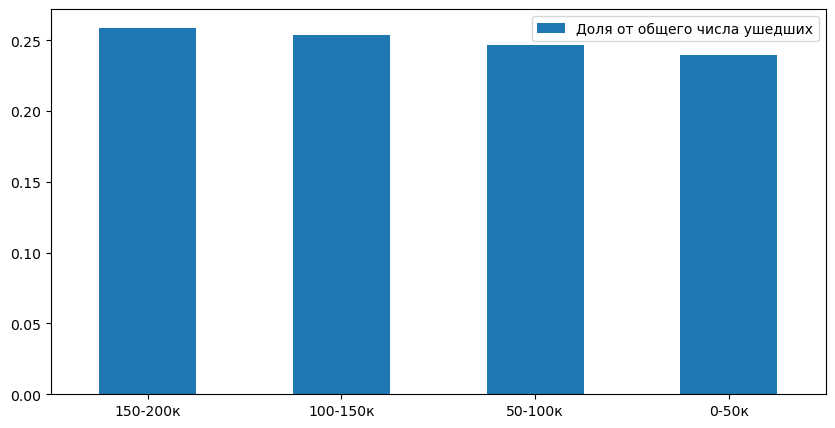

In [226]:
tmp.index = ['0-50к','50-100к','100-150к','150-200к']

tmp = tmp.sort_values(by='Доля от общего числа ушедших',ascending=False)
tmp.plot(y='Доля от общего числа ушедших',kind='bar',figsize=(10,5))
plt.xticks(rotation = 0)
plt.show()

In [228]:
tmp = data.groupby('gender',as_index=False).agg({'age':'count','churn':'sum'})
tmp['perc of churn'] = round(tmp['churn']/tmp['age'],2)
tmp['churn_overall'] = round(tmp['churn']/cat_data['churn'].sum(),3)
tmp.columns=('Пол','Ушло клиентов','Размер группы','Доля ушедших','Доля от общего числа ушедших')
tmp

,Пол,Ушло клиентов,Размер группы,Доля ушедших,Доля от общего числа ушедших
0,Ж,4543,1139,0.25,0.559
1,М,5457,898,0.16,0.441


<b>Вывод: </b> Женщины уходят чаще мужчин. 

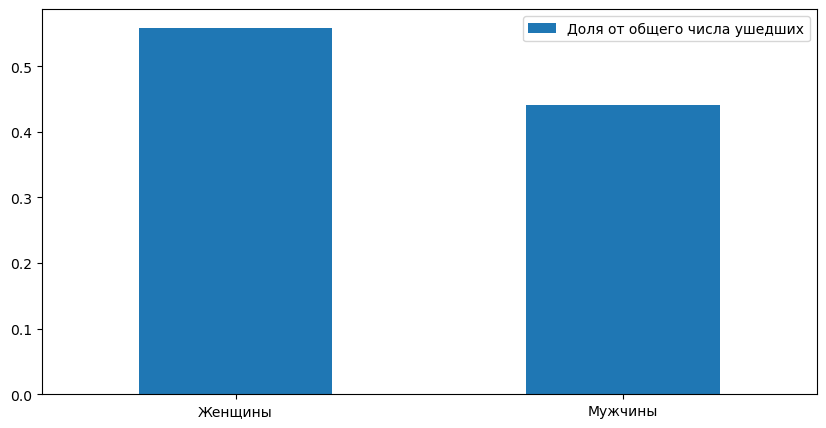

In [230]:
tmp.index = ['Женщины','Мужчины']
tmp = tmp.sort_values(by='Доля от общего числа ушедших',ascending=False)
tmp.plot(y='Доля от общего числа ушедших',kind='bar',figsize=(10,5))
plt.xticks(rotation = 0)
plt.show()

<b>2.3 Выделение семента клиентов, склонных к уходу</b>

In [126]:
groupA = cat_data[(cat_data['balance_group'] == 3) & (cat_data['age_group'] == 3) & (cat_data['city_Ростов Великий'] == 1)]

In [127]:
print("Размер Группы 1 составляет",groupA['userid'].count(),"человек. Процент ушедших клиентов в этой группе составляет",
      round(groupA['churn'].sum()/groupA['userid'].count(),1)*100,"%")

Размер Группы 1 составляет 246 человек. Процент ушедших клиентов в этой группе составляет 70.0 %


<b>Группа 1:</b> Из общего датасета была выделена группа: Клиенты с балансом от 100к до 150к, в возрасте от 50 до 65 лет из Ростова Великого

In [128]:
groupB = cat_data[(cat_data['score_group'] == 3) & (cat_data['products'] == 1) & (cat_data['gender_Ж'] == 1)]

In [129]:
print("Размер Группы 2 составляет",groupB['userid'].count(),"человек. Процент ушедших клиентов в этой группе составляет",
      round(groupB['churn'].sum()/groupB['userid'].count(),1)*100,"%")

Размер Группы 2 составляет 1765 человек. Процент ушедших клиентов в этой группе составляет 30.0 %


<b>Группа 2:</b> клиенты с количеством кредитных очков от 551 до 800, с одним продуктом, женщины

<b>Формулировка и проверка гепотез</b>

<b>3.1 Формулировка гипотезы 1</b>
- <b>H0:</b> Доходы клиентов, которые уходят и тех, которые остаются равны
- <b>H1:</b> Доходы клиентов, которые уходят и тех, которые остаются значительно различаются

<b>3.2 Проверка гепотезы 1</b>

In [130]:
churn = cat_data[cat_data['churn'] == 1 ]['estimated_salary']
loyal = cat_data[cat_data['churn'] == 0 ]['estimated_salary']
alpha = .05
results = st.mannwhitneyu(churn,loyal,True,'less')
print('P-значение: ',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

P-значение:  0.886475899493893
Не удалось отвергнуть нулевую гипотезу


<b>3.1 Формулировка гипотезы 2</b>
- <b>H0: </b> Количество продуктов у клиентов, которые уходят и тех, которые остаются равны
- <b>H1: </b> Количество продуктов у клиентов, которые уходят и тех, которые остаются значительно различаются

In [131]:
churn = cat_data[cat_data['churn'] == 1 ]['products']
loyal = cat_data[cat_data['churn'] == 0 ]['products']
alpha = .05
results = st.mannwhitneyu(churn,loyal,True,'less')
print('P-значение: ',results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не удалось отвергнуть нулевую гипотезу")

P-значение:  2.637552606408597e-36
Отвергаем нулевую гипотезу


<b>4. Подведение итогов исследования, составление рекомендаций </b>

<b>Вывод по сегменту 1:</b> Нужно изучить работу банка в Ростове Великом, возможно есть проблемы с обслуживанием. Так же стоит проработать работу с возрастными клиентами, как-то упростить интерфейсы, сделать опрос по удобству пользования услугами банком. Сделать этой группе специальные предложения(более выгодные условия).  
<b>Вывод по сегменту 2:</b> сюда попали люди с хорошей кредитной историей, нужно посмотреть на каких условиях предлагаются кредиты, на сколько удобно их гасить, наличие лишь одного продукта может говорить о том, что людей не заинтересовали остальные, возможно этой группе людей нужны более интересные продукты, связанные с кредитованием. Изучить какие продукты предлагают конкуренты и на сколько они популярны и внедрить наиболее популярные из них. Возможно стоит переработать дизайн приложения, на тот который больше понравится женщинам, так же сделать спец. предложения группе.